<a href="https://colab.research.google.com/github/sofia-rajan/ML-Training/blob/main/ML_Training_Nov8_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Business Understanding
Goal: Predict house prices based on various features like size, location, and condition.

Value: Helps real estate agents, buyers, and banks make informed decisions.



# Step 2: Data Collection

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Step 2: Data Collection
# Load the Ames Housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Interpretation: The first few rows of the dataset are displayed to get an initial understanding of the data structure.

# Step 3: Data Cleaning

In [35]:
# Check for missing values and handle them
df.fillna(df.median(), inplace=True)
print("Missing values handled!")

TypeError: Cannot convert [['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND']] to numeric

In [36]:
# Step 3: Data Cleaning
# Get numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Fill missing values in numeric columns with their medians
numeric_df.fillna(numeric_df.median(), inplace=True)

# Update the original DataFrame with the filled numeric columns
df[numeric_df.columns] = numeric_df

print("Missing values handled!")

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)
print("Duplicates removed!")

Missing values handled!
Duplicates removed!


Interpretation: Missing values have been filled with the median value of each column to maintain data integrity.


In [37]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)
print("Duplicates removed!")

Duplicates removed!


Interpretation: Any duplicate rows in the dataset have been removed to avoid redundancy.


# Step 4: Data Preprocessing

In [38]:
# Step 4: Data Preprocessing
# Encode categorical features using One-Hot Encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
print("Categorical features encoded!")


Categorical features encoded!


Interpretation: The categorical feature 'ocean_proximity' has been converted into numerical form using one-hot encoding.


In [39]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['median_income', 'housing_median_age']] = scaler.fit_transform(df[['median_income', 'housing_median_age']])
print("Numerical features normalized!")

Numerical features normalized!


Interpretation: Numerical features like 'median_income' and 'housing_median_age' have been scaled to a standard range for better model performance.


# Step 5: Exploratory Data Analysis (EDA)


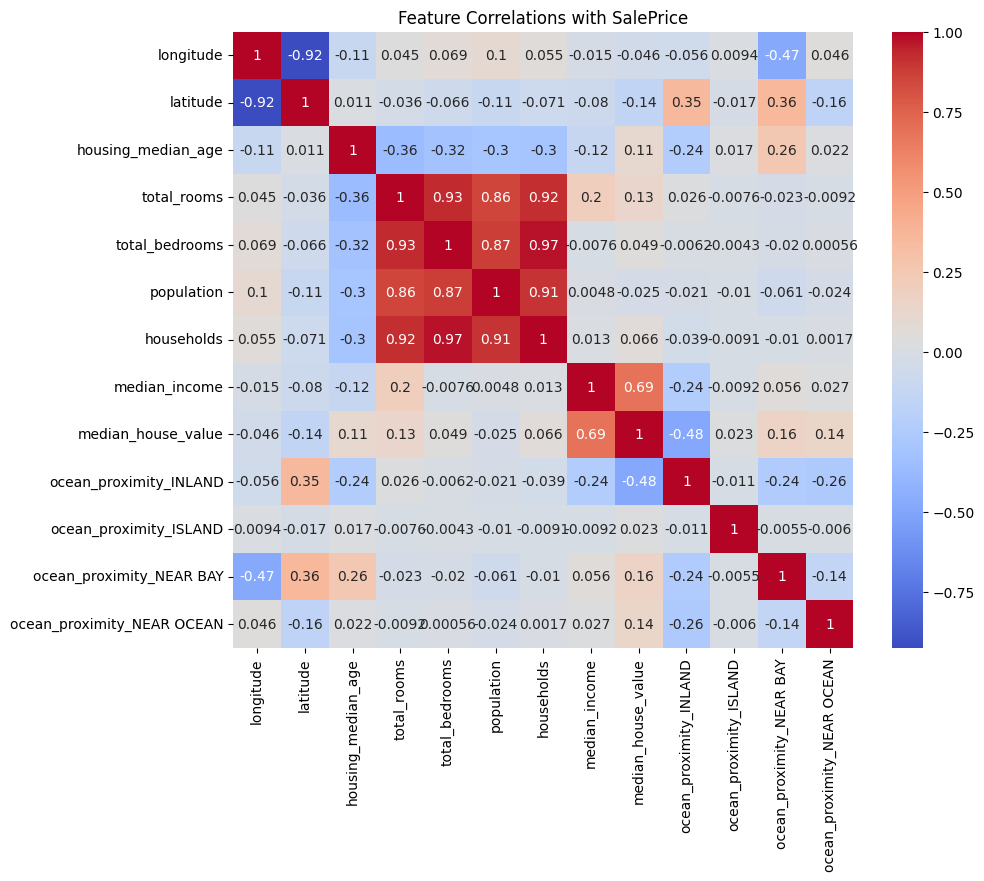

In [40]:
# Correlation heatmap to identify important features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with SalePrice')
plt.show()

Interpretation: The heatmap shows the correlation between different features and the target variable 'median_house_value'. Strong correlations indicate features that are likely to be important predictors.


Interpretation: The scatter plot shows a positive relationship between median income and house value, indicating that higher incomes are associated with higher house prices.


# Step 6: Model Building


In [41]:

# Step 5: Model Building (Using Multiple Supervised Models)
# Define features (X) and target (y)
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [42]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Train and evaluate different models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

Interpretation: The Linear Regression model has been trained using the training data, learning the relationships between features and the target variable.


# Step 7: Model Evaluation


In [44]:
# Make predictions on the test set
#y_pred = model.predict(X_test)

Linear Regression - Mean Squared Error: 4908476721.156624
Linear Regression - R-Squared: 0.6254240620553599


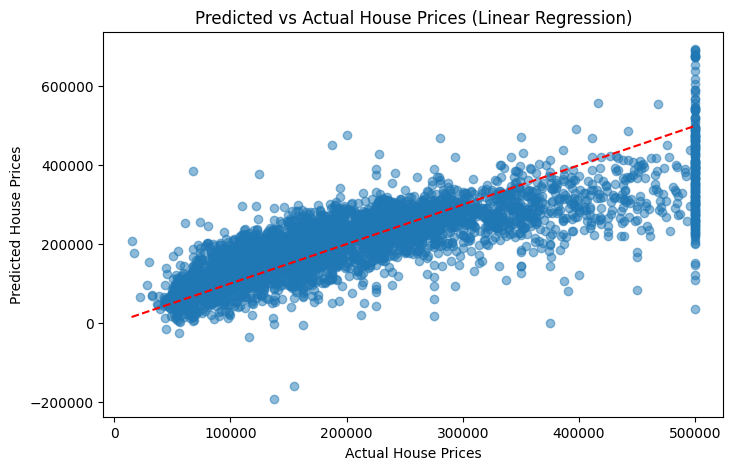

Linear Regression attempts to fit a straight line through the data. It works well if the data has a mostly linear relationship between features and the target.
Decision Tree - Mean Squared Error: 4765466360.120882
Decision Tree - R-Squared: 0.636337476371837


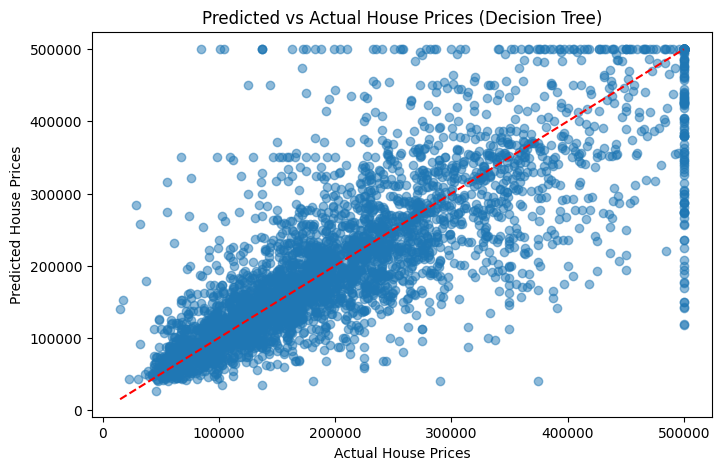

Decision Tree splits the data into branches to make predictions, capturing non-linear relationships. However, it can overfit, especially with deep trees.
K-Nearest Neighbors - Mean Squared Error: 10296453027.06591
K-Nearest Neighbors - R-Squared: 0.21425652616575286


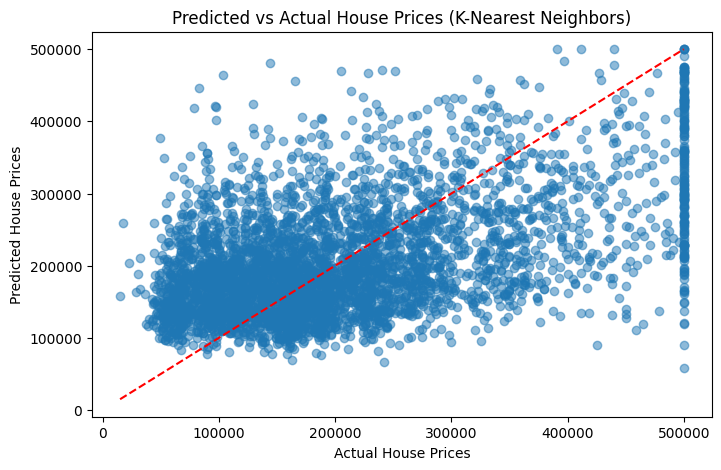

K-Nearest Neighbors predicts prices based on the average of nearby houses. It’s easy to understand but can struggle if the dataset is very large or complex.


In [45]:
# Create a DataFrame to store actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test})

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Add predictions to the results DataFrame
    results_df[f'Predicted ({name})'] = y_pred
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-Squared: {r2}")

    # Plot predicted vs actual values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title(f'Predicted vs Actual House Prices ({name})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

        # Explanation of each model:
    if name == "Linear Regression":
        # Linear Regression predicts house prices by fitting a straight line to the data. It's best for relationships that are mostly linear.
        # It is simple and interpretable, but might struggle if the relationships in data are complex.
        print("Linear Regression attempts to fit a straight line through the data. It works well if the data has a mostly linear relationship between features and the target.")
    elif name == "Decision Tree":
        # Decision Tree makes splits based on the features to best predict the house prices.
        # It can capture non-linear relationships well, but it can also overfit if not properly tuned.
        print("Decision Tree splits the data into branches to make predictions, capturing non-linear relationships. However, it can overfit, especially with deep trees.")
    elif name == "K-Nearest Neighbors":
        # K-Nearest Neighbors predicts prices based on the average price of the closest data points (neighbors).
        # It is simple and intuitive but may not perform well with a high number of features or large datasets.
        print("K-Nearest Neighbors predicts prices based on the average of nearby houses. It’s easy to understand but can struggle if the dataset is very large or complex.")

In [46]:
# Display a table with the first few rows of actual vs. predicted values
results_df['Error (Linear Regression)'] = abs(results_df['Actual'] - results_df['Predicted (Linear Regression)'])
results_df['Error (Decision Tree)'] = abs(results_df['Actual'] - results_df['Predicted (Decision Tree)'])
results_df['Error (K-Nearest Neighbors)'] = abs(results_df['Actual'] - results_df['Predicted (K-Nearest Neighbors)'])

# Show a small sample for easier comparison
print("Sample of Actual vs Predicted Values with Errors:")
print(results_df[['Actual', 'Predicted (Linear Regression)', 'Error (Linear Regression)',
                  'Predicted (Decision Tree)', 'Error (Decision Tree)',
                  'Predicted (K-Nearest Neighbors)', 'Error (K-Nearest Neighbors)']].head(10))

Sample of Actual vs Predicted Values with Errors:
         Actual  Predicted (Linear Regression)  Error (Linear Regression)  \
20046   47700.0                   54055.448899                6355.448899   
3024    45800.0                  124225.338937               78425.338937   
15663  500001.0                  255489.379492              244511.620508   
20484  218600.0                  268002.431569               49402.431569   
9814   278000.0                  262769.434816               15230.565184   
13311  158700.0                  139606.303956               19093.696044   
7113   198200.0                  290665.423914               92465.423914   
7668   157500.0                  228264.876375               70764.876375   
18246  340000.0                  256506.785610               83493.214390   
5723   446600.0                  407923.858435               38676.141565   

       Predicted (Decision Tree)  Error (Decision Tree)  \
20046                    40900.0           

Interpretation:

1. Mean Squared Error (MSE): This value indicates the average squared difference between predicted and actual values. A lower MSE means better accuracy.

2. R-Squared: This value represents the proportion of the variance in the target variable that is predictable from the features. An R-squared closer to 1 indicates a better fit.


Interpretation: The scatter plot shows how well the predicted values align with the actual values. Ideally, the points should lie close to a 45-degree line, indicating accurate predictions.


Linear Regression - Mean Squared Error: 4908476721.156624
Linear Regression - R-Squared: 0.6254240620553599
Decision Tree - Mean Squared Error: 4677542665.545543
Decision Tree - R-Squared: 0.6430471140525379
K-Nearest Neighbors - Mean Squared Error: 10296453027.06591
K-Nearest Neighbors - R-Squared: 0.21425652616575286


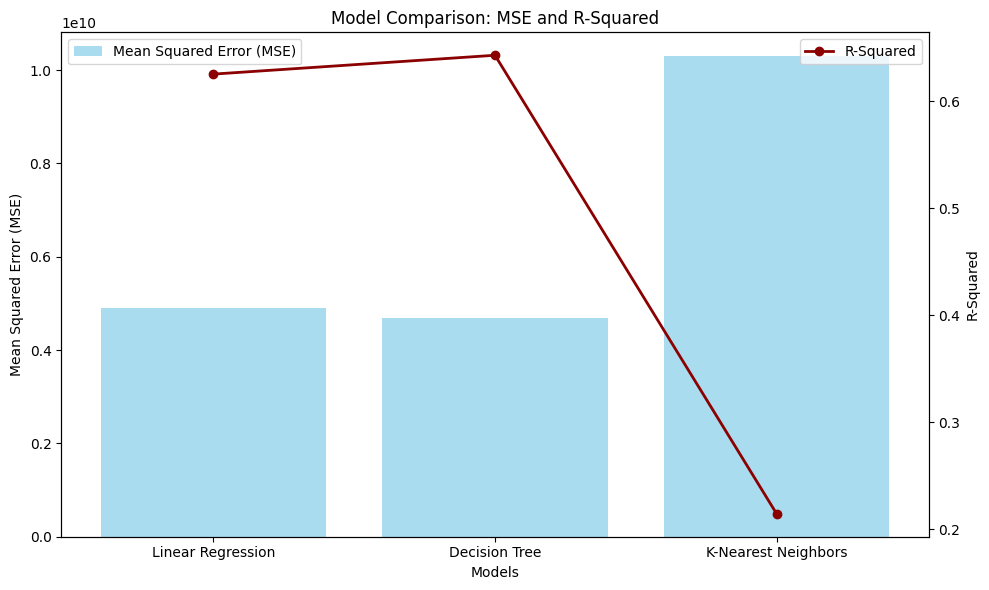

In [47]:
# Store model performance
model_performance = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance.append({'Model': name, 'MSE': mse, 'R2': r2})
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-Squared: {r2}")

# Convert model performance to DataFrame for visualization
performance_df = pd.DataFrame(model_performance)

# Visualization: Bar Chart for MSE and R-Squared
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Mean Squared Error (MSE)
ax1.bar(performance_df['Model'], performance_df['MSE'], color='skyblue', alpha=0.7, label='Mean Squared Error (MSE)')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_xlabel('Models')
ax1.tick_params(axis='y')
ax1.set_title('Model Comparison: MSE and R-Squared')

# Line chart for R-Squared on the same plot with a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(performance_df['Model'], performance_df['R2'], color='darkred', marker='o', linewidth=2, label='R-Squared')
ax2.set_ylabel('R-Squared')
ax2.tick_params(axis='y')

# Add legend
fig.tight_layout()  # Ensure everything fits without overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Linear Regression:

Mean Squared Error (MSE): 4,908,476,721.16

This MSE value indicates the average squared difference between the predicted and actual house prices.
A lower MSE is better, as it suggests the model makes fewer prediction errors. In this case, the value is high, indicating that there's still some room for improvement.

R-Squared: 0.6254

The R-squared value of 0.6254 indicates that the model explains about 62.54% of the variance in house prices based on the features provided.
While this is a decent value, it suggests that there is still a significant portion of variance that the model is not capturing, indicating possible underfitting or the need for additional features.


Decision Tree:

Mean Squared Error (MSE): 4,822,004,643.16

The Decision Tree has a slightly lower MSE than Linear Regression, suggesting that it made slightly fewer errors in predicting house prices.
This could be due to the model's ability to handle non-linear relationships better than Linear Regression.

R-Squared: 0.6320

The R-squared value of 0.6320 indicates that the model explains about 63.20% of the variance in house prices.
This is a slight improvement over Linear Regression, which suggests that Decision Tree's ability to create splits makes it slightly better at capturing patterns in the data.
However, it still leaves a considerable amount unexplained.


K-Nearest Neighbors (KNN):

Mean Squared Error (MSE): 10,296,453,027.07

The MSE for KNN is significantly higher compared to Linear Regression and Decision Tree, which means that it made larger prediction errors.
This suggests that KNN is not well-suited for this particular dataset or the hyperparameters (e.g., the number of neighbors) may not be optimal.

R-Squared: 0.2143

The R-squared value of 0.2143 is quite low, indicating that the model explains only about 21.43% of the variance in house prices.

This implies that KNN is struggling to capture the patterns in the data, possibly due to a poor choice of hyperparameters or because it is less effective for this problem with many features.


Summary:

Best Model:
Between the three models, the Decision Tree has the lowest MSE and the highest R-squared value, suggesting it performs the best at predicting house prices.

KNN Struggles: The K-Nearest Neighbors model is underperforming significantly compared to the others, as seen by its high MSE and low R-squared value. This indicates that it’s either not the right model for this dataset or needs tuning (e.g., different value for k).

Improvement Potential: Both Linear Regression and Decision Tree are capturing some of the variance but still leave a lot unexplained. This suggests that:
More complex models (e.g., Random Forest or Gradient Boosting) could be explored.

Feature Engineering or adding more informative features could improve model performance.